In [1]:
import spacy
import pandas as pd
import numpy as np

In [2]:
import spacy

nlp = spacy.load('en_core_web_lg')
  
print("Enter two space-separated words")
words = input()
  
tokens = nlp(words)
  
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)
  
token1, token2 = tokens[0], tokens[1]
  
print("Similarity:", token1.similarity(token2))

Enter two space-separated words
dog cat
dog True 7.0336733 False
cat True 6.6808186 False
Similarity: 0.8016855120658875


In [3]:
df = pd.read_csv("words.csv")
n = 20
df2 = df.sample(n)
df2

,word
2473,someone
415,chain
2076,proof
1431,issue
752,differ
504,come
1597,manner
1743,net
2421,simple
1447,journal


In [4]:
nlp = spacy.load('en_core_web_lg')

A = np.empty((n, n))

i = 0
j = 0
for word1 in df2["word"]:
    j = 0
    for word2 in df2["word"]:
        wordComp = word1 + " " + word2
        tokens = nlp(wordComp)
        token1, token2 = tokens[0], tokens[1]
        A[i,j] = token1.similarity(token2)
        j += 1
    i += 1
A

array([[1.        , 0.21298809, 0.41556692, 0.3785415 , 0.26028404,
        0.54711914, 0.38945866, 0.22344379, 0.44130224, 0.18030746,
        0.36877009, 0.23150295, 0.26633769, 0.29668322, 0.3501302 ,
        0.63683331, 0.21010634, 0.22593552, 0.36593574, 0.24564628],
       [0.21298809, 1.        , 0.18800542, 0.10304449, 0.18150924,
        0.21310274, 0.24380615, 0.18213987, 0.27516761, 0.13443303,
        0.14076504, 0.14511938, 0.11738111, 0.14066443, 0.18058881,
        0.25262383, 0.07891182, 0.23536059, 0.20203836, 0.2877675 ],
       [0.41556692, 0.18800542, 1.        , 0.35515106, 0.2542994 ,
        0.38796857, 0.34265792, 0.15154704, 0.35762072, 0.16738208,
        0.23482071, 0.08722084, 0.1953216 , 0.17734991, 0.19401708,
        0.49900034, 0.12404088, 0.26257968, 0.26460683, 0.33476388],
       [0.3785415 , 0.10304449, 0.35515106, 1.        , 0.27339077,
        0.35960832, 0.29737398, 0.21914527, 0.25899258, 0.4040058 ,
        0.33930805, 0.06718449, 0.37712288, 0

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

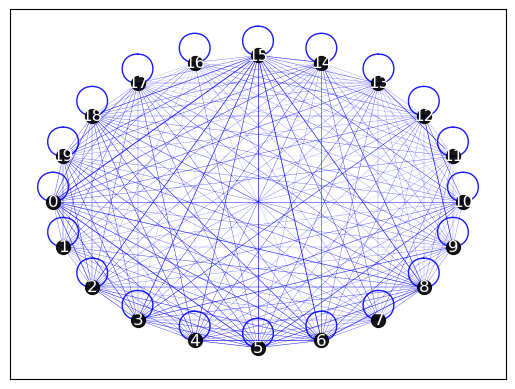

In [6]:
G = nx.from_numpy_matrix(A)
layout = nx.spring_layout(G)
widths = nx.get_edge_attributes(G, 'weight')
nodelist = G.nodes()
pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=100,
                       node_color='black',
                       alpha=0.9)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='blue',
                       alpha=0.9)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='white')
#nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()